## 資料檢查

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight.csv'
data = pd.read_csv(file_path)

# 檢查是否有缺失值(僅顯示有缺失值的欄位)
print(data.isnull().sum())

# 分離經濟艙與商務艙的數據
economy_class_data = data[data["艙等"] == "經濟艙"].copy()
business_class_data = data[data["艙等"] == "商務艙"].copy()

y_cols = ['平均價格', '最低價格', '中位數價格', '價格變異', '最低價格剩餘天數']
print(economy_class_data[y_cols].describe())
print(business_class_data[y_cols].describe())

出發日期                 0
星期                   0
出發時間                 0
出發時段                 0
出發機場代號               0
抵達時間                 0
抵達時段                 0
抵達機場代號               0
航空公司                 0
航空聯盟                 0
停靠站數量                0
停留時間                 0
飛行時間                 0
飛行時間_分鐘              0
是否過夜                 0
是否為平日                0
機型                   2
機型分類                 0
航班代碼                 0
艙等                   0
假期                   0
平均價格                 0
最低價格                 0
中位數價格                0
價格變異                 0
隨機購買平均價格             0
最低價格剩餘天數             0
筆數                   0
平均價格_log             0
最低價格_log             0
價格變異_log             0
中位數價格_log            0
最低價格剩餘天數_log         0
Region               0
經濟指標                 0
機場指標                 0
competing_flights    0
dtype: int64
               平均價格          最低價格         中位數價格          價格變異     最低價格剩餘天數
count   6706.000000   6706.000000   6706.000000  6.706000e+03

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 0. 繁體中文顯示設定
# --------------------------
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# --------------------------
# 1. 讀取資料並移除重複欄位名稱
# --------------------------
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight.csv'
data = pd.read_csv(file_path)
data = data.loc[:, ~data.columns.duplicated()]

# --------------------------
# 2. 定義「同一航班」判斷欄位
# --------------------------
dup_subset = ['出發日期', '出發時間', '航班代碼']

# --------------------------
# 3. 分離經濟艙與商務艙
#    （請確認你的欄位名稱，這裡假設是 '艙等'）
# --------------------------
econ = data[data['艙等'] == '經濟艙']
biz  = data[data['艙等'] == '商務艙']

# --------------------------
# 4. 檢查重複的函式
# --------------------------
def check_duplicates(df, class_name):
    dups = df[df.duplicated(subset=dup_subset, keep=False)]
    count = len(dups)
    print(f"=== {class_name}：共 {count} 筆重複航班 ===")
    if count > 0:
        cols = dup_subset + ['出發機場代號', '抵達機場代號', '航空公司', '平均價格']  # 可視需求調整
        print(dups[cols]
              .sort_values(by=dup_subset)
              .to_string(index=False))
    else:
        print("沒有發現重複。")
    print()

# --------------------------
# 5. 執行檢查
# --------------------------
check_duplicates(econ, '經濟艙')
check_duplicates(biz,  '商務艙')

=== 經濟艙：共 0 筆重複航班 ===
沒有發現重複。

=== 商務艙：共 0 筆重複航班 ===
沒有發現重複。



## Histogram

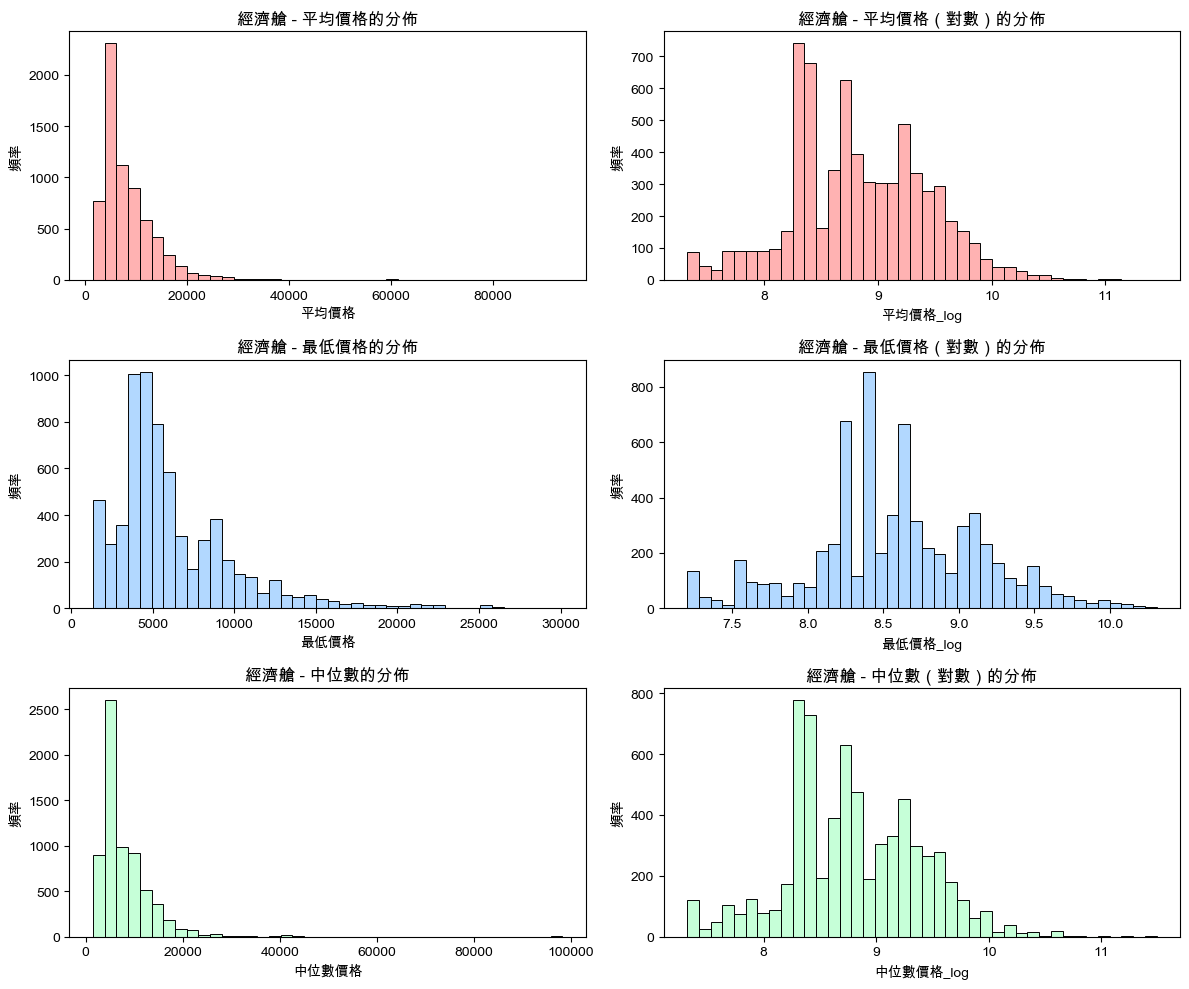

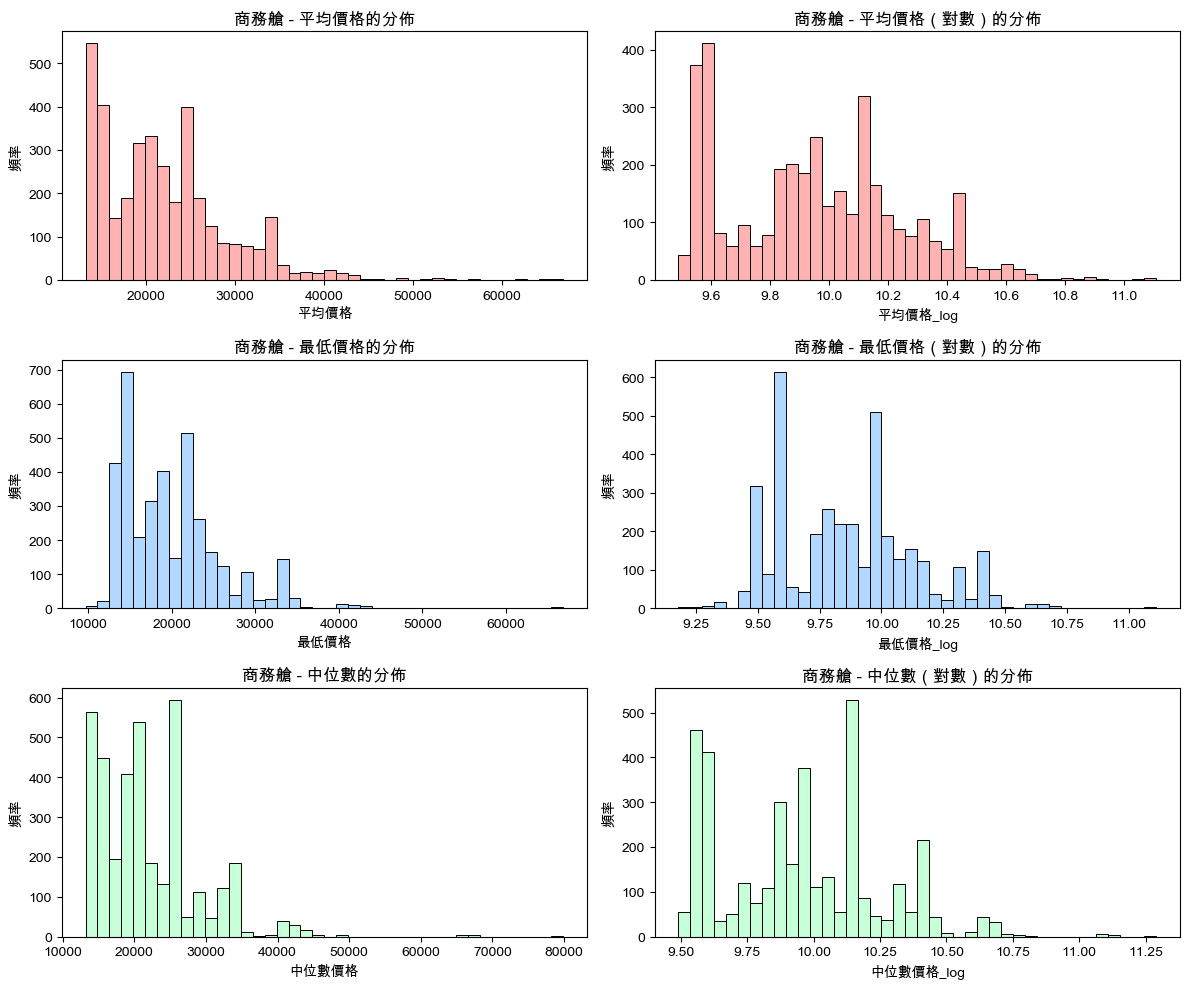

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight.csv'
data = pd.read_csv(file_path)

# 分離經濟艙與商務艙的數據
economy_class_data = data[data["艙等"] == "經濟艙"].copy()
business_class_data = data[data["艙等"] == "商務艙"].copy()

# 要繪製的欄位與標題設定
plot_columns = [
    ("平均價格", "平均價格的分佈", "#FF9999"),
    ("平均價格_log", "平均價格（對數）的分佈", "#FF9999"),
    ("最低價格", "最低價格的分佈", "#99CCFF"),
    ("最低價格_log", "最低價格（對數）的分佈", "#99CCFF"),
    ("中位數價格", "中位數的分佈", "#B3FFCC"),
    ("中位數價格_log", "中位數（對數）的分佈", "#B3FFCC"),
]

def plot_histograms(class_data, class_name):
    fig, axes = plt.subplots(3, 2, figsize=(12, 10))
    bins = 40

    for i, (col, title, color) in enumerate(plot_columns):
        row = i // 2
        col_idx = i % 2
        sns.histplot(class_data[col], bins=bins, color=color, ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'{class_name} - {title}')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('頻率')

    plt.tight_layout()
    plt.show()

# 繪製經濟艙圖表
plot_histograms(economy_class_data, "經濟艙")

# 繪製商務艙圖表
plot_histograms(business_class_data, "商務艙")

## Boxplot:平均價格_log

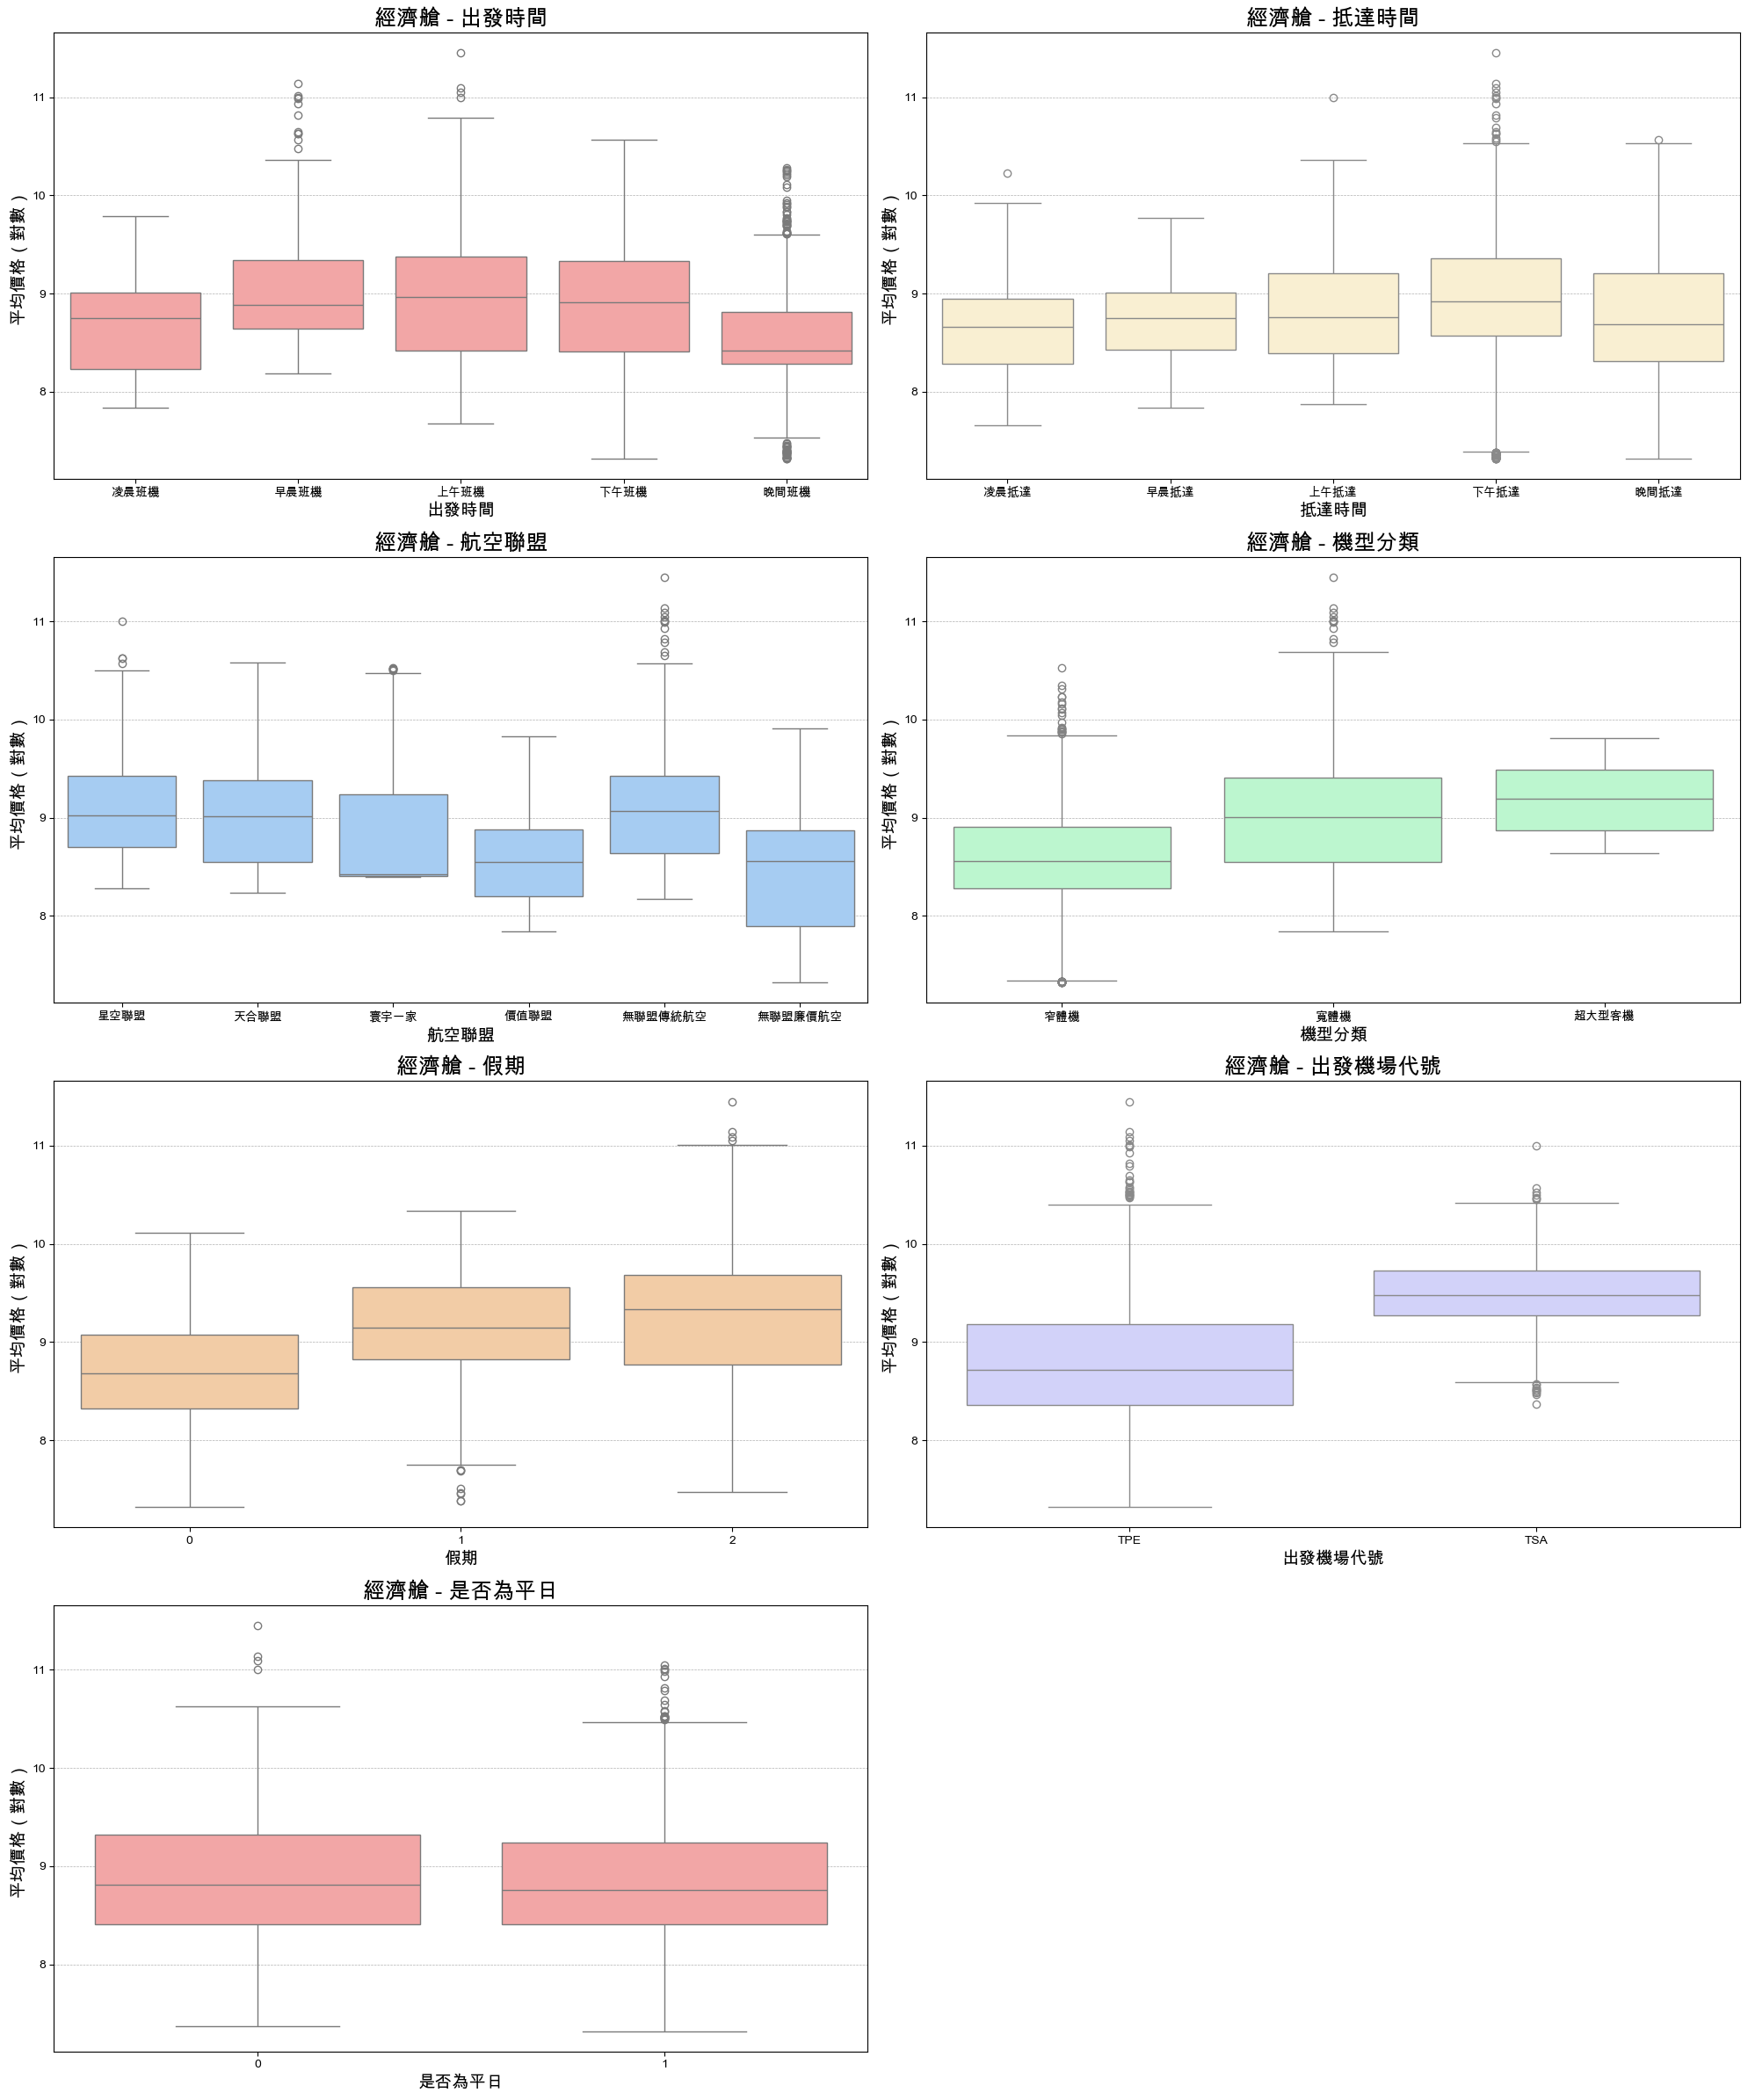

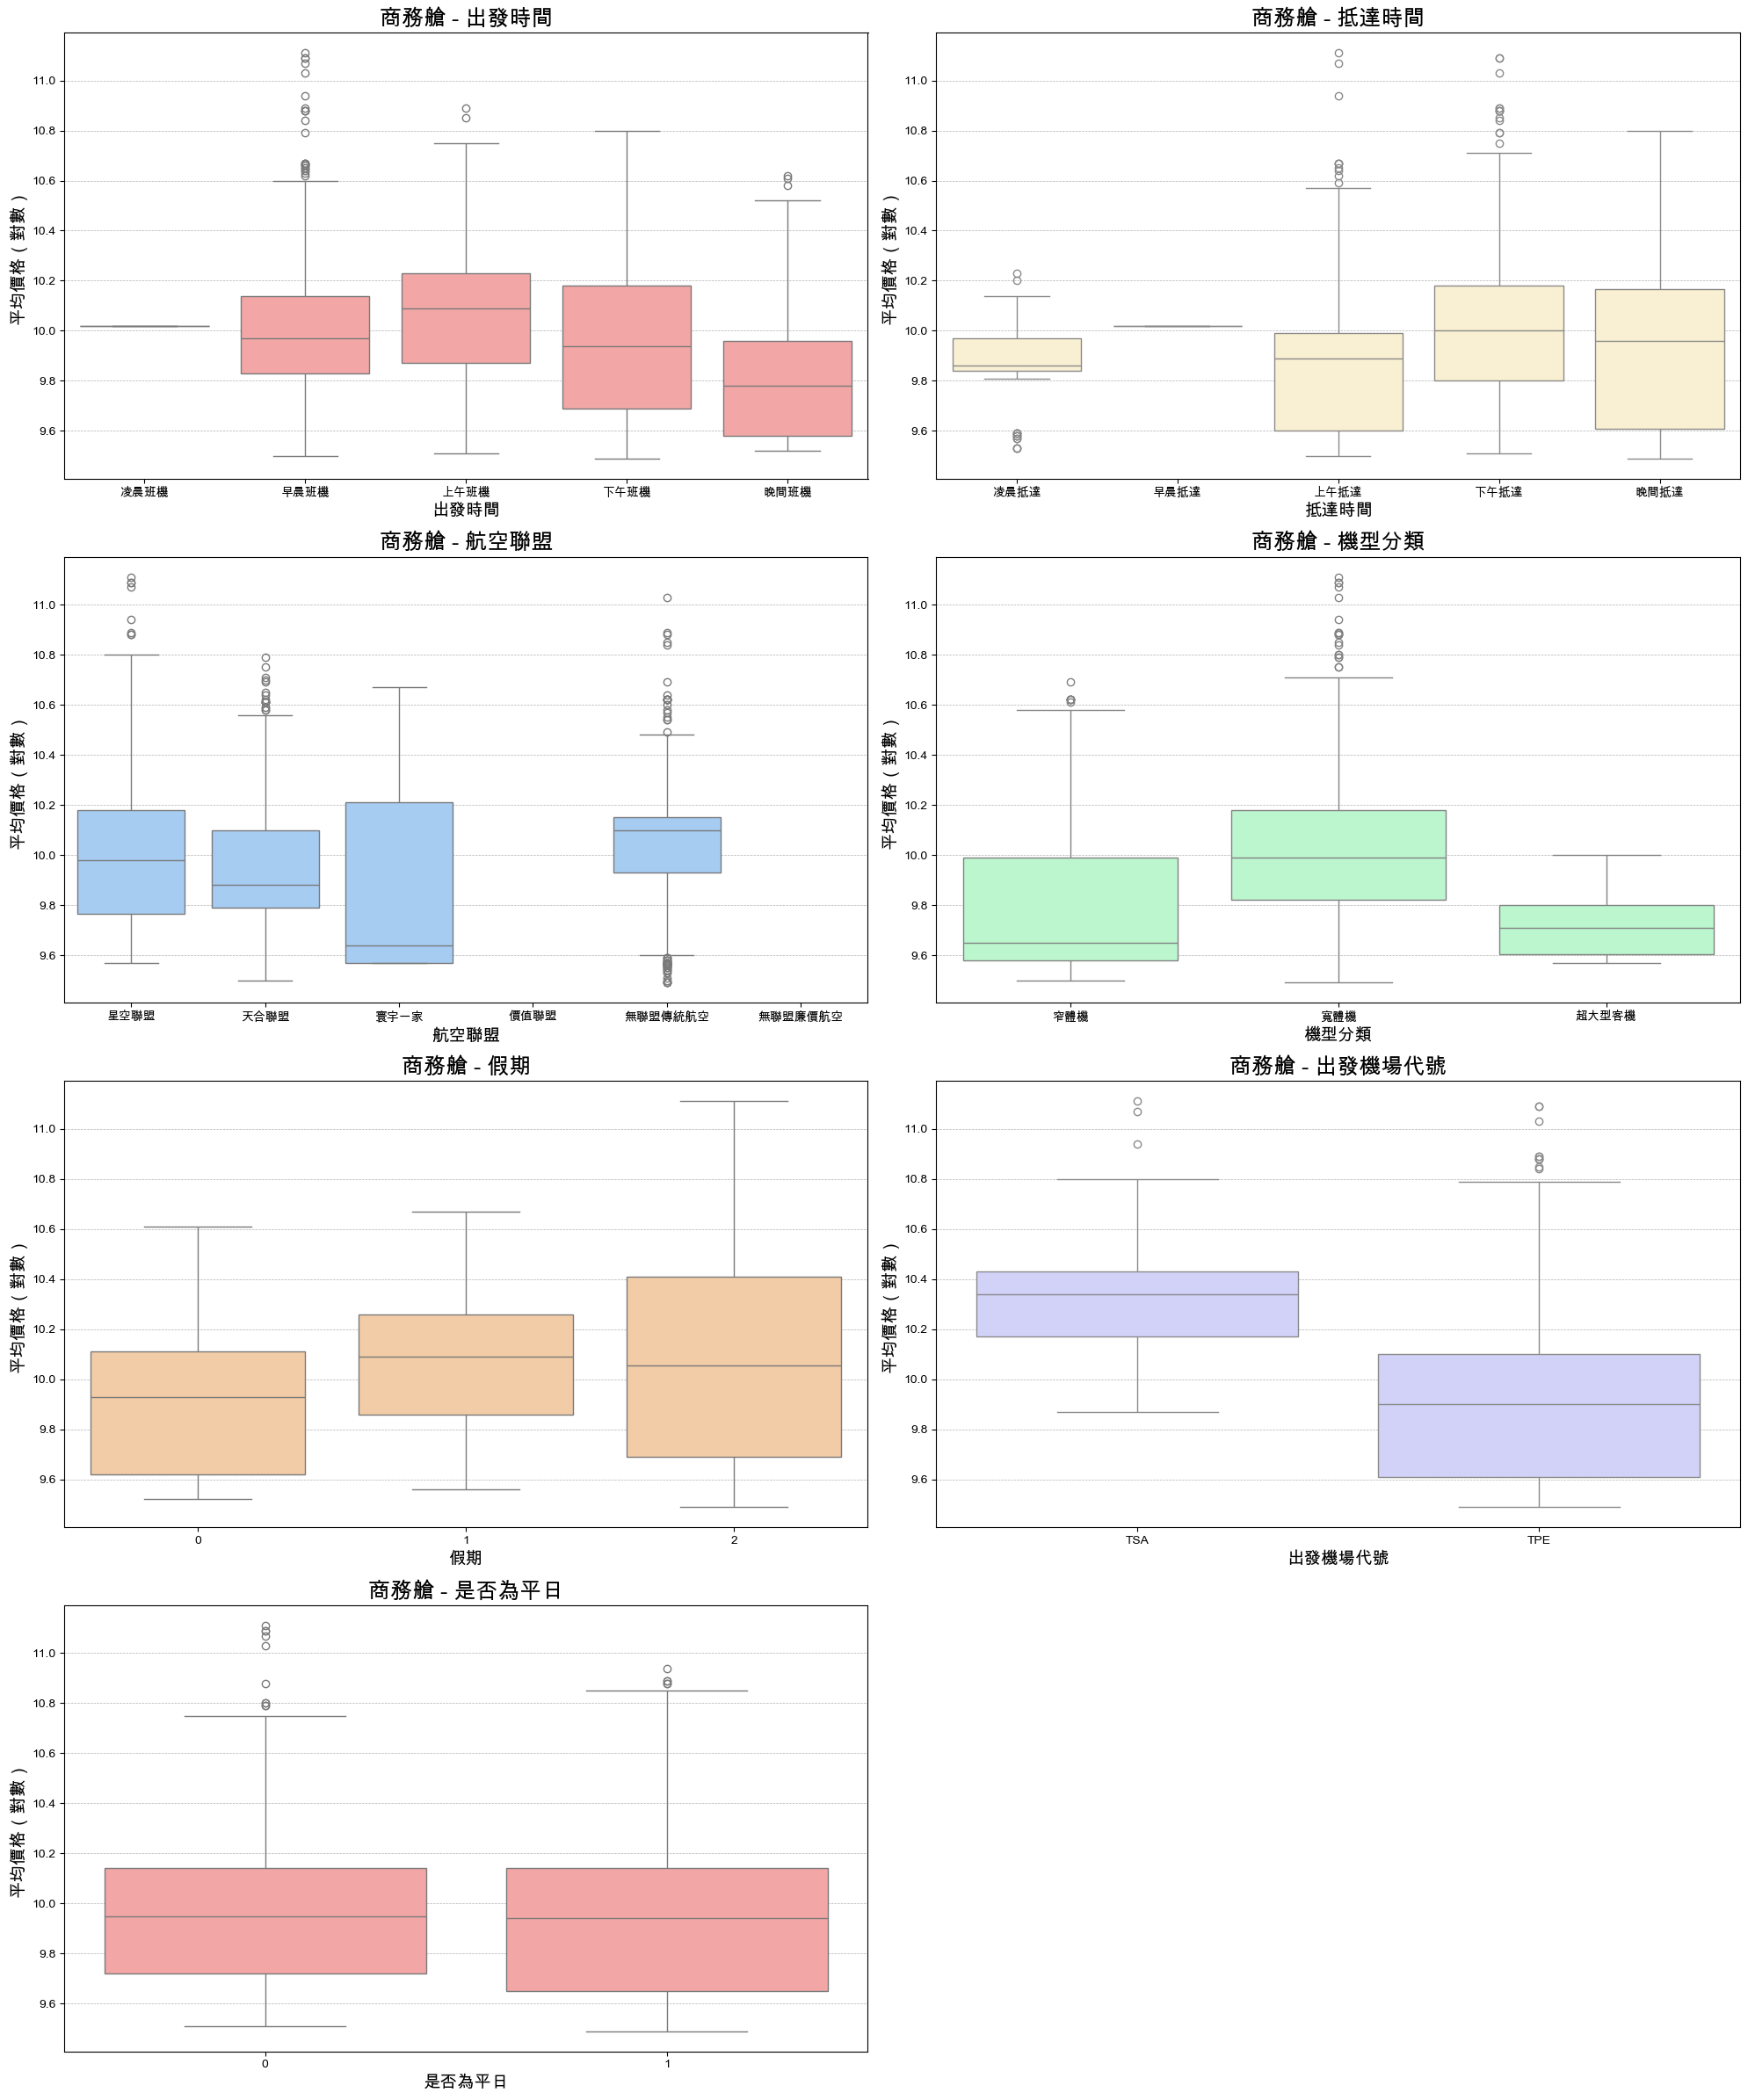

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight.csv'
data = pd.read_csv(file_path)

# ===== 資料前處理 =====
# 出發時段排序
departure_order = ["凌晨班機", "早晨班機", "上午班機", "下午班機", "晚間班機"]
data['出發時段'] = pd.Categorical(data['出發時段'], categories=departure_order, ordered=True)

# 抵達時段排序
arrival_order = ["凌晨抵達", "早晨抵達", "上午抵達", "下午抵達", "晚間抵達"]
data['抵達時段'] = pd.Categorical(data['抵達時段'], categories=arrival_order, ordered=True)

# 航空聯盟分類
alliance_mapping = {
    1: '星空聯盟',
    2: '天合聯盟',
    3: '寰宇一家',
    4: '價值聯盟',
    5: '無聯盟傳統航空',
    6: '無聯盟廉價航空'
}
data['航空聯盟'] = data['航空聯盟'].replace(alliance_mapping)
alliance_order = list(alliance_mapping.values())
data['航空聯盟'] = pd.Categorical(data['航空聯盟'], categories=alliance_order, ordered=True)

# 機型分類
category_mapping = {0: '窄體機', 1: '寬體機', 2: '超大型客機'}
data['機型分類'] = data['機型分類'].map(category_mapping)
category_order = list(category_mapping.values())
data['機型分類'] = pd.Categorical(data['機型分類'], categories=category_order, ordered=True)

# 星期排序
weekday_order = ["星期一", "星期二", "星期三", "星期四", "星期五", "星期六", "星期日"]
data['星期'] = pd.Categorical(data['星期'], categories=weekday_order, ordered=True)

# 分艙等
economy_data = data[data['艙等'] == '經濟艙']
business_data = data[data['艙等'] == '商務艙']

# ===== 設定變數 =====
y_col_var = '平均價格_log'
y_label_text = '平均價格（對數）'
title_fontsize = 18
label_fontsize = 14

# ===== 繪圖函式 =====
def plot_box(data, x_col, y_col, ax, title, x_label, y_label, color):
    sns.boxplot(data=data, x=x_col, y=y_col, ax=ax, color=color)
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xlabel(x_label, fontsize=label_fontsize)
    ax.set_ylabel(y_label, fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

def draw_boxplots_for_class(class_data, class_name):
    fig, axes = plt.subplots(4, 2, figsize=(20, 24))

    plot_box(class_data.sort_values('出發時段'), '出發時段', y_col_var, axes[0, 0],
             f'{class_name} - 出發時間', '出發時間', y_label_text, '#FF9999')
    plot_box(class_data.sort_values('抵達時段'), '抵達時段', y_col_var, axes[0, 1],
             f'{class_name} - 抵達時間', '抵達時間', y_label_text, '#FFF2CC')
    plot_box(class_data.sort_values('航空聯盟'), '航空聯盟', y_col_var, axes[1, 0],
             f'{class_name} - 航空聯盟', '航空聯盟', y_label_text, '#99CCFF')
    plot_box(class_data.sort_values('機型分類'), '機型分類', y_col_var, axes[1, 1],
             f'{class_name} - 機型分類', '機型分類', y_label_text, '#B3FFCC')
    plot_box(class_data, '假期', y_col_var, axes[2, 0],
             f'{class_name} - 假期', '假期', y_label_text, '#FFCC99')
    plot_box(class_data, '出發機場代號', y_col_var, axes[2, 1],
             f'{class_name} - 出發機場代號', '出發機場代號', y_label_text, '#CCCCFF')
    plot_box(class_data, '是否為平日', y_col_var, axes[3, 0],
             f'{class_name} - 是否為平日', '是否為平日', y_label_text, '#FF9999')
    
    # 隱藏最後一個子圖
    axes[3, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# 繪製經濟艙 & 商務艙
draw_boxplots_for_class(economy_data, "經濟艙")
draw_boxplots_for_class(business_data, "商務艙")

## boxplot:中位數價格_log

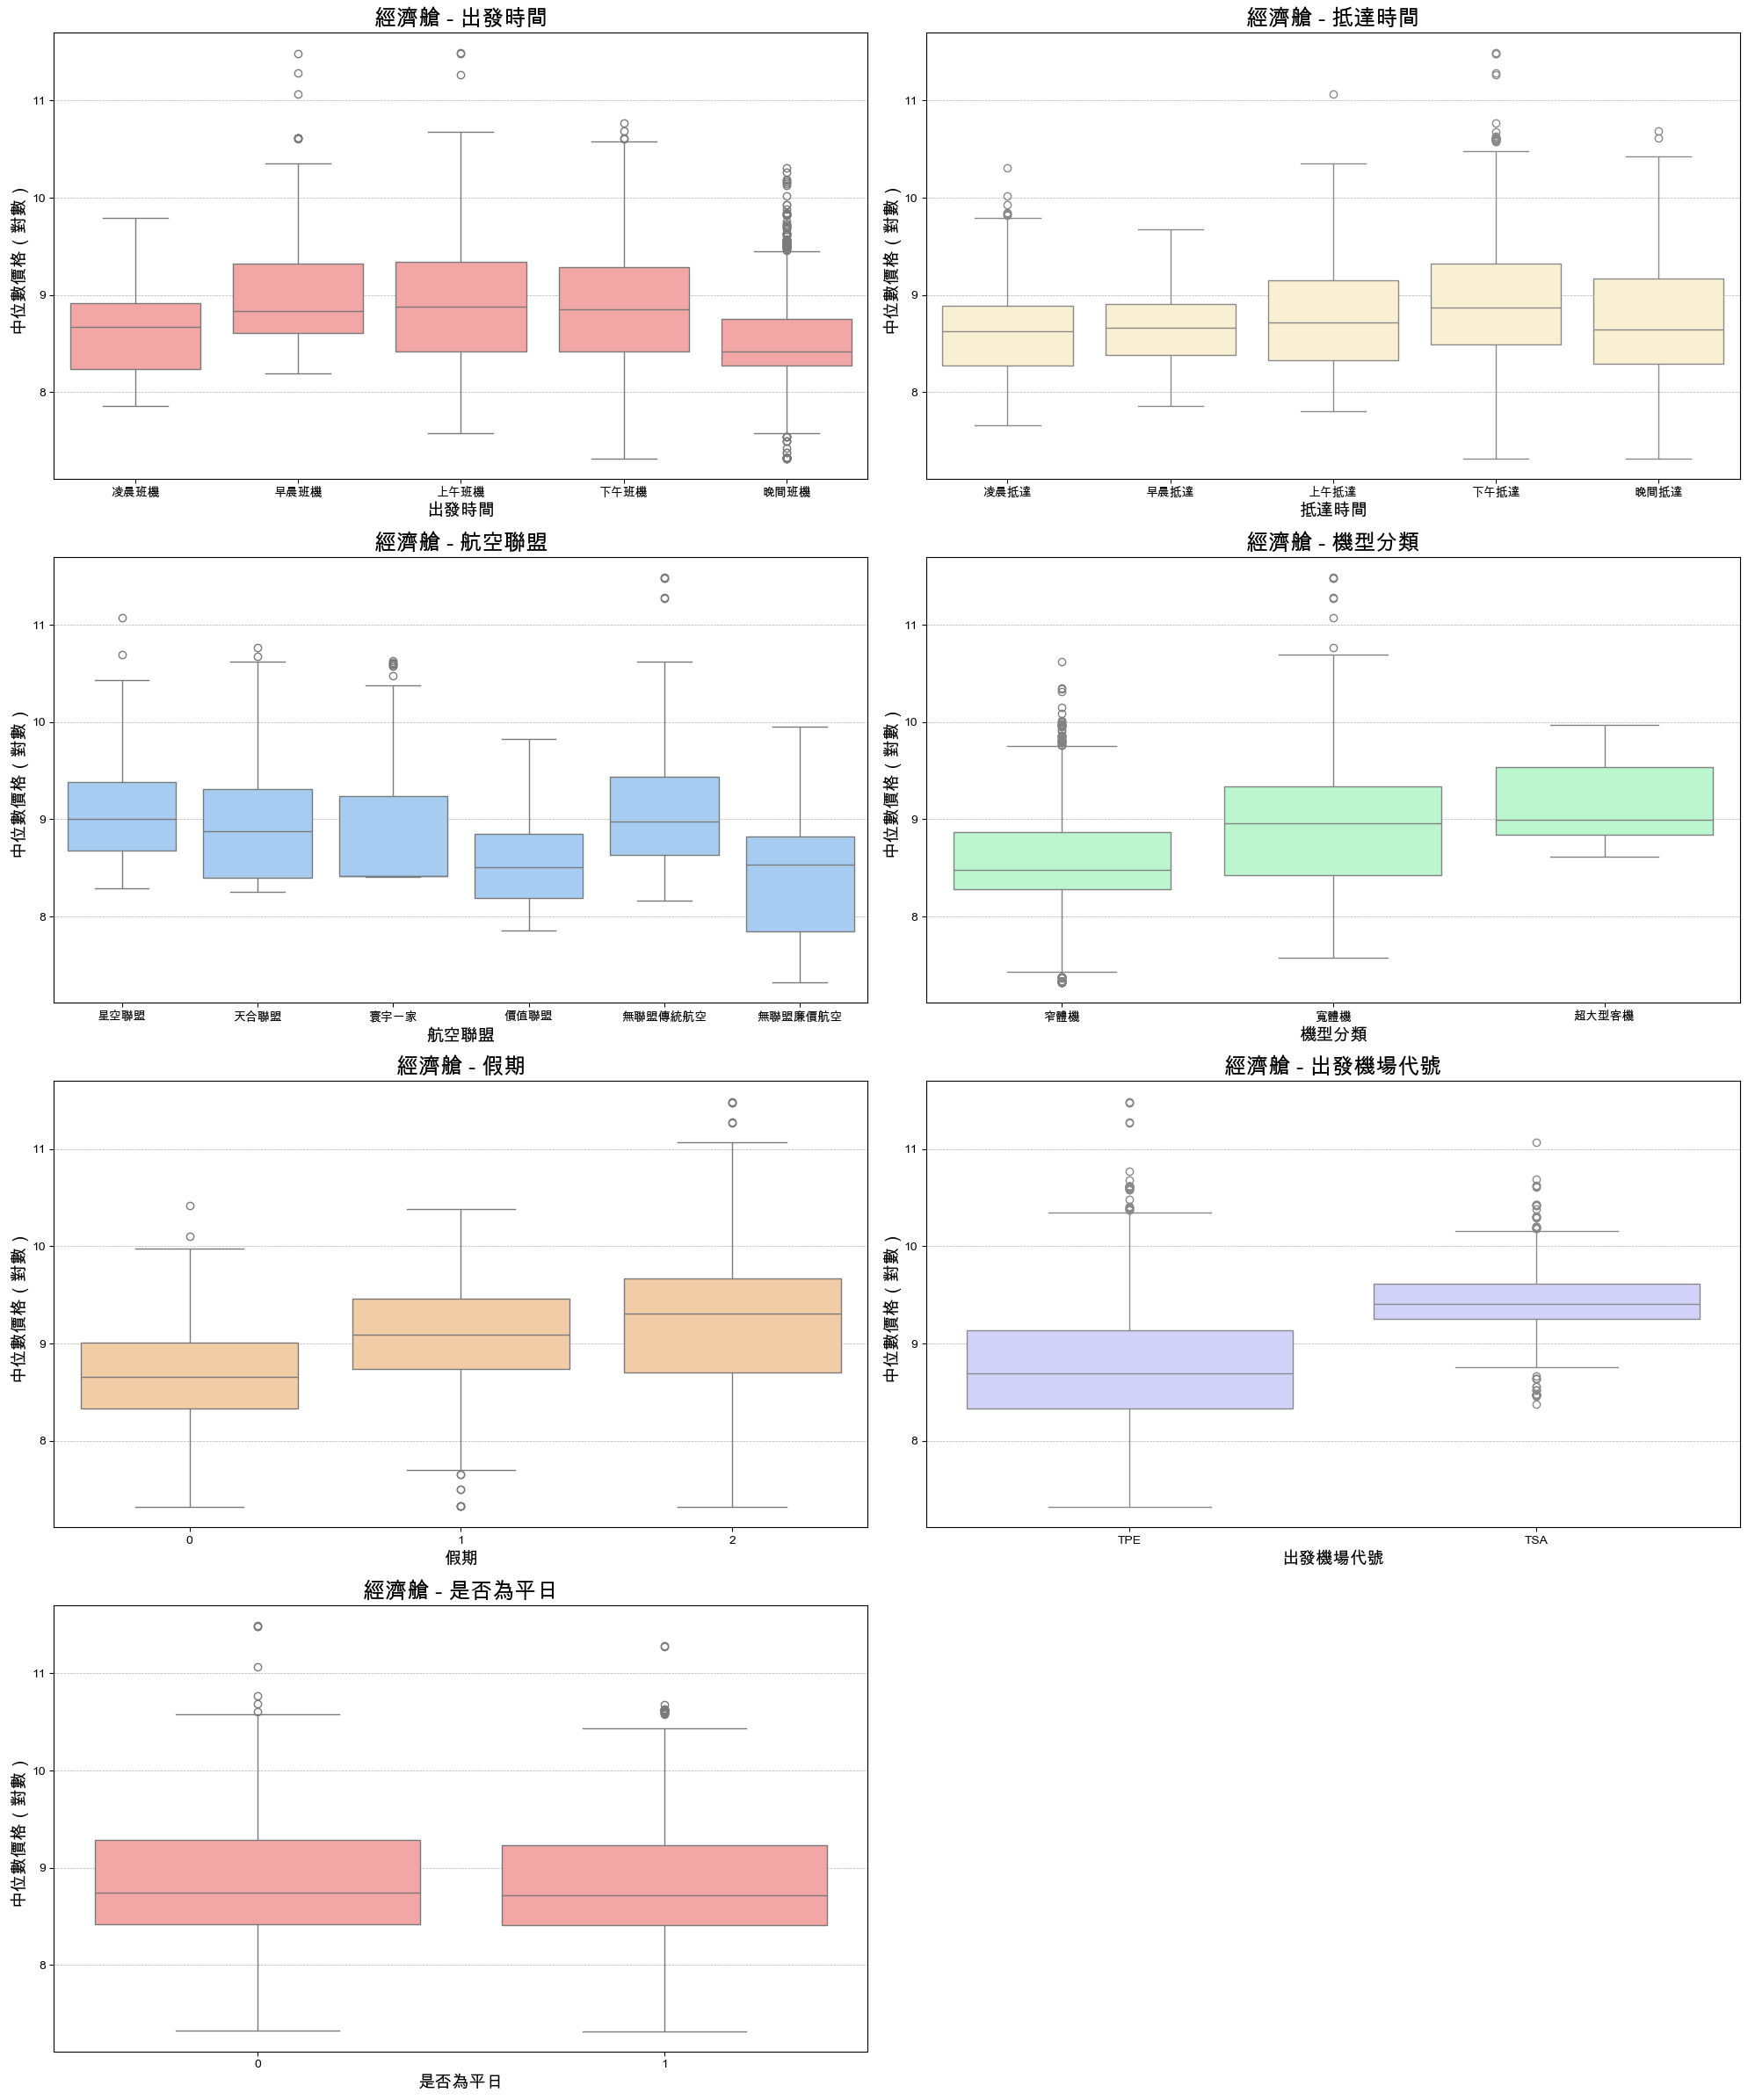

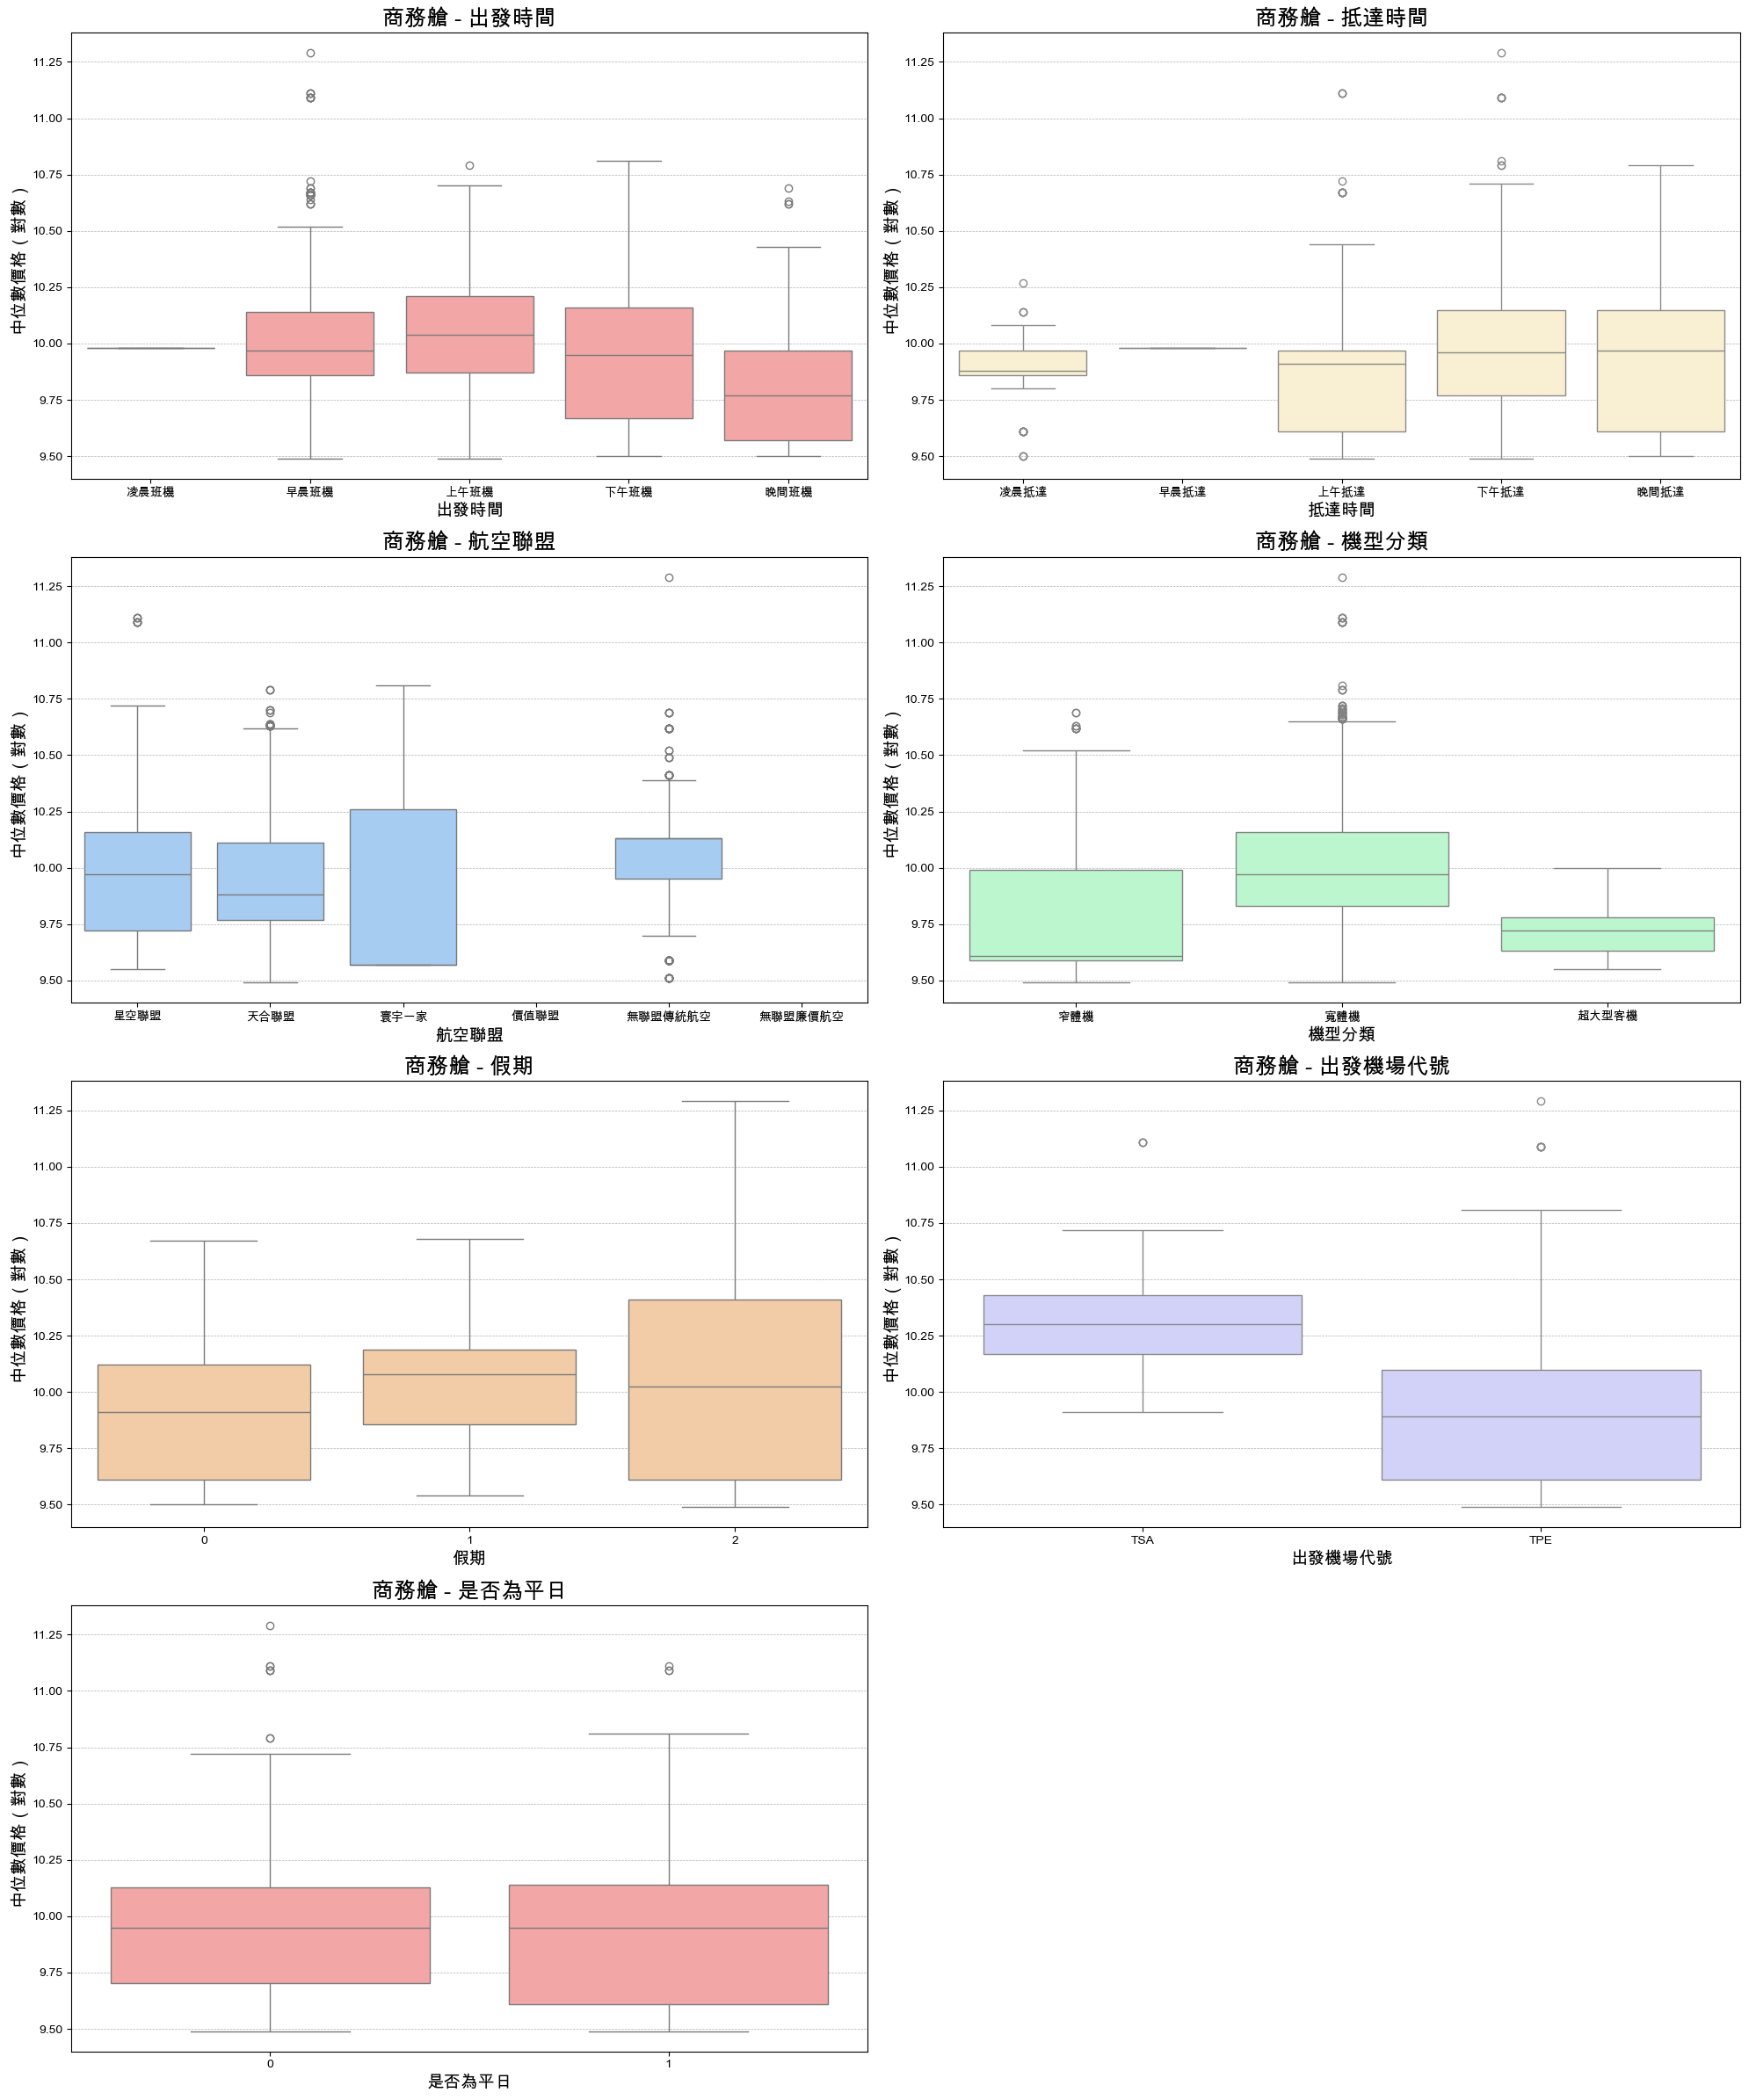

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight.csv'
data = pd.read_csv(file_path)

# ===== 資料前處理 =====
# 出發時段排序
departure_order = ["凌晨班機", "早晨班機", "上午班機", "下午班機", "晚間班機"]
data['出發時段'] = pd.Categorical(data['出發時段'], categories=departure_order, ordered=True)

# 抵達時段排序
arrival_order = ["凌晨抵達", "早晨抵達", "上午抵達", "下午抵達", "晚間抵達"]
data['抵達時段'] = pd.Categorical(data['抵達時段'], categories=arrival_order, ordered=True)

# 航空聯盟分類
alliance_mapping = {
    1: '星空聯盟',
    2: '天合聯盟',
    3: '寰宇一家',
    4: '價值聯盟',
    5: '無聯盟傳統航空',
    6: '無聯盟廉價航空'
}
data['航空聯盟'] = data['航空聯盟'].replace(alliance_mapping)
alliance_order = list(alliance_mapping.values())
data['航空聯盟'] = pd.Categorical(data['航空聯盟'], categories=alliance_order, ordered=True)

# 機型分類
category_mapping = {0: '窄體機', 1: '寬體機', 2: '超大型客機'}
data['機型分類'] = data['機型分類'].map(category_mapping)
category_order = list(category_mapping.values())
data['機型分類'] = pd.Categorical(data['機型分類'], categories=category_order, ordered=True)

# 星期排序
weekday_order = ["星期一", "星期二", "星期三", "星期四", "星期五", "星期六", "星期日"]
data['星期'] = pd.Categorical(data['星期'], categories=weekday_order, ordered=True)

# 分艙等
economy_data = data[data['艙等'] == '經濟艙']
business_data = data[data['艙等'] == '商務艙']

# ===== 設定變數 =====
y_col_var = '中位數價格_log'
y_label_text = '中位數價格（對數）'
title_fontsize = 18
label_fontsize = 14

# ===== 繪圖函式 =====
def plot_box(data, x_col, y_col, ax, title, x_label, y_label, color):
    sns.boxplot(data=data, x=x_col, y=y_col, ax=ax, color=color)
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xlabel(x_label, fontsize=label_fontsize)
    ax.set_ylabel(y_label, fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

def draw_boxplots_for_class(class_data, class_name):
    fig, axes = plt.subplots(4, 2, figsize=(20, 24))

    plot_box(class_data.sort_values('出發時段'), '出發時段', y_col_var, axes[0, 0],
             f'{class_name} - 出發時間', '出發時間', y_label_text, '#FF9999')
    plot_box(class_data.sort_values('抵達時段'), '抵達時段', y_col_var, axes[0, 1],
             f'{class_name} - 抵達時間', '抵達時間', y_label_text, '#FFF2CC')
    plot_box(class_data.sort_values('航空聯盟'), '航空聯盟', y_col_var, axes[1, 0],
             f'{class_name} - 航空聯盟', '航空聯盟', y_label_text, '#99CCFF')
    plot_box(class_data.sort_values('機型分類'), '機型分類', y_col_var, axes[1, 1],
             f'{class_name} - 機型分類', '機型分類', y_label_text, '#B3FFCC')
    plot_box(class_data, '假期', y_col_var, axes[2, 0],
             f'{class_name} - 假期', '假期', y_label_text, '#FFCC99')
    plot_box(class_data, '出發機場代號', y_col_var, axes[2, 1],
             f'{class_name} - 出發機場代號', '出發機場代號', y_label_text, '#CCCCFF')
    plot_box(class_data, '是否為平日', y_col_var, axes[3, 0],
             f'{class_name} - 是否為平日', '是否為平日', y_label_text, '#FF9999')

    # 隱藏最後一個子圖
    axes[3, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# 繪製經濟艙 & 商務艙
draw_boxplots_for_class(economy_data, "經濟艙")
draw_boxplots_for_class(business_data, "商務艙")

## boxplot:最低價格_log

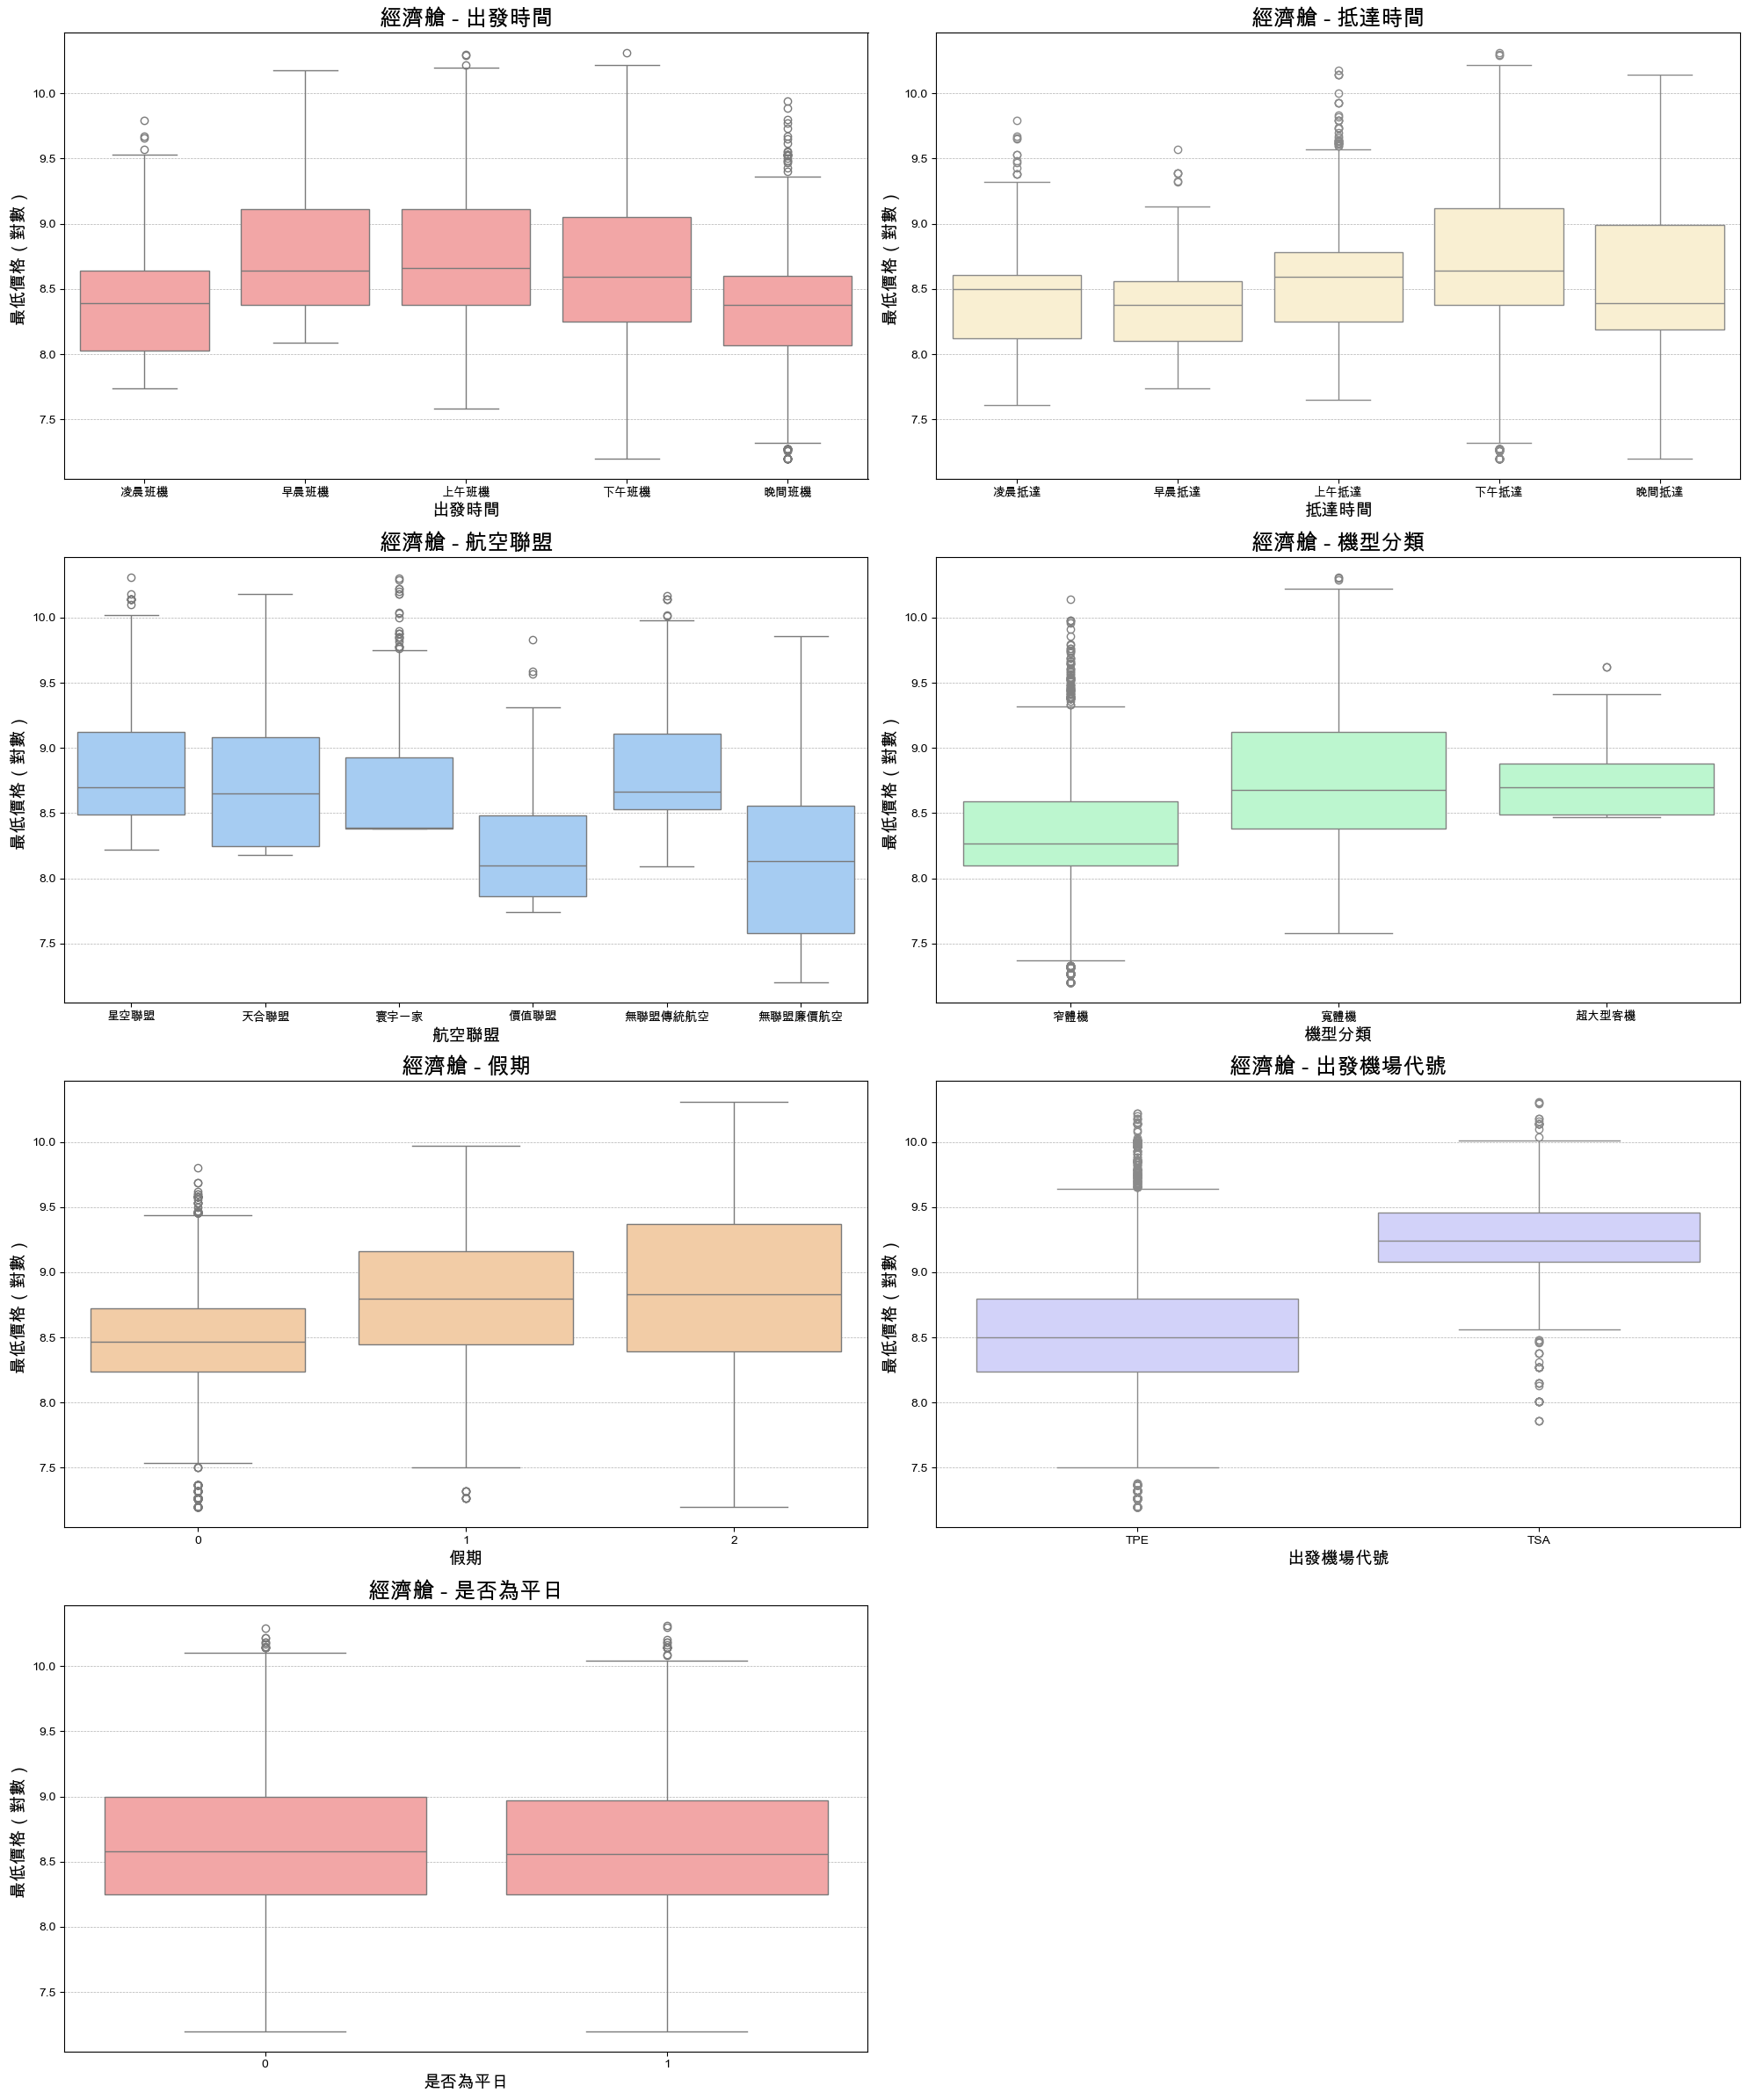

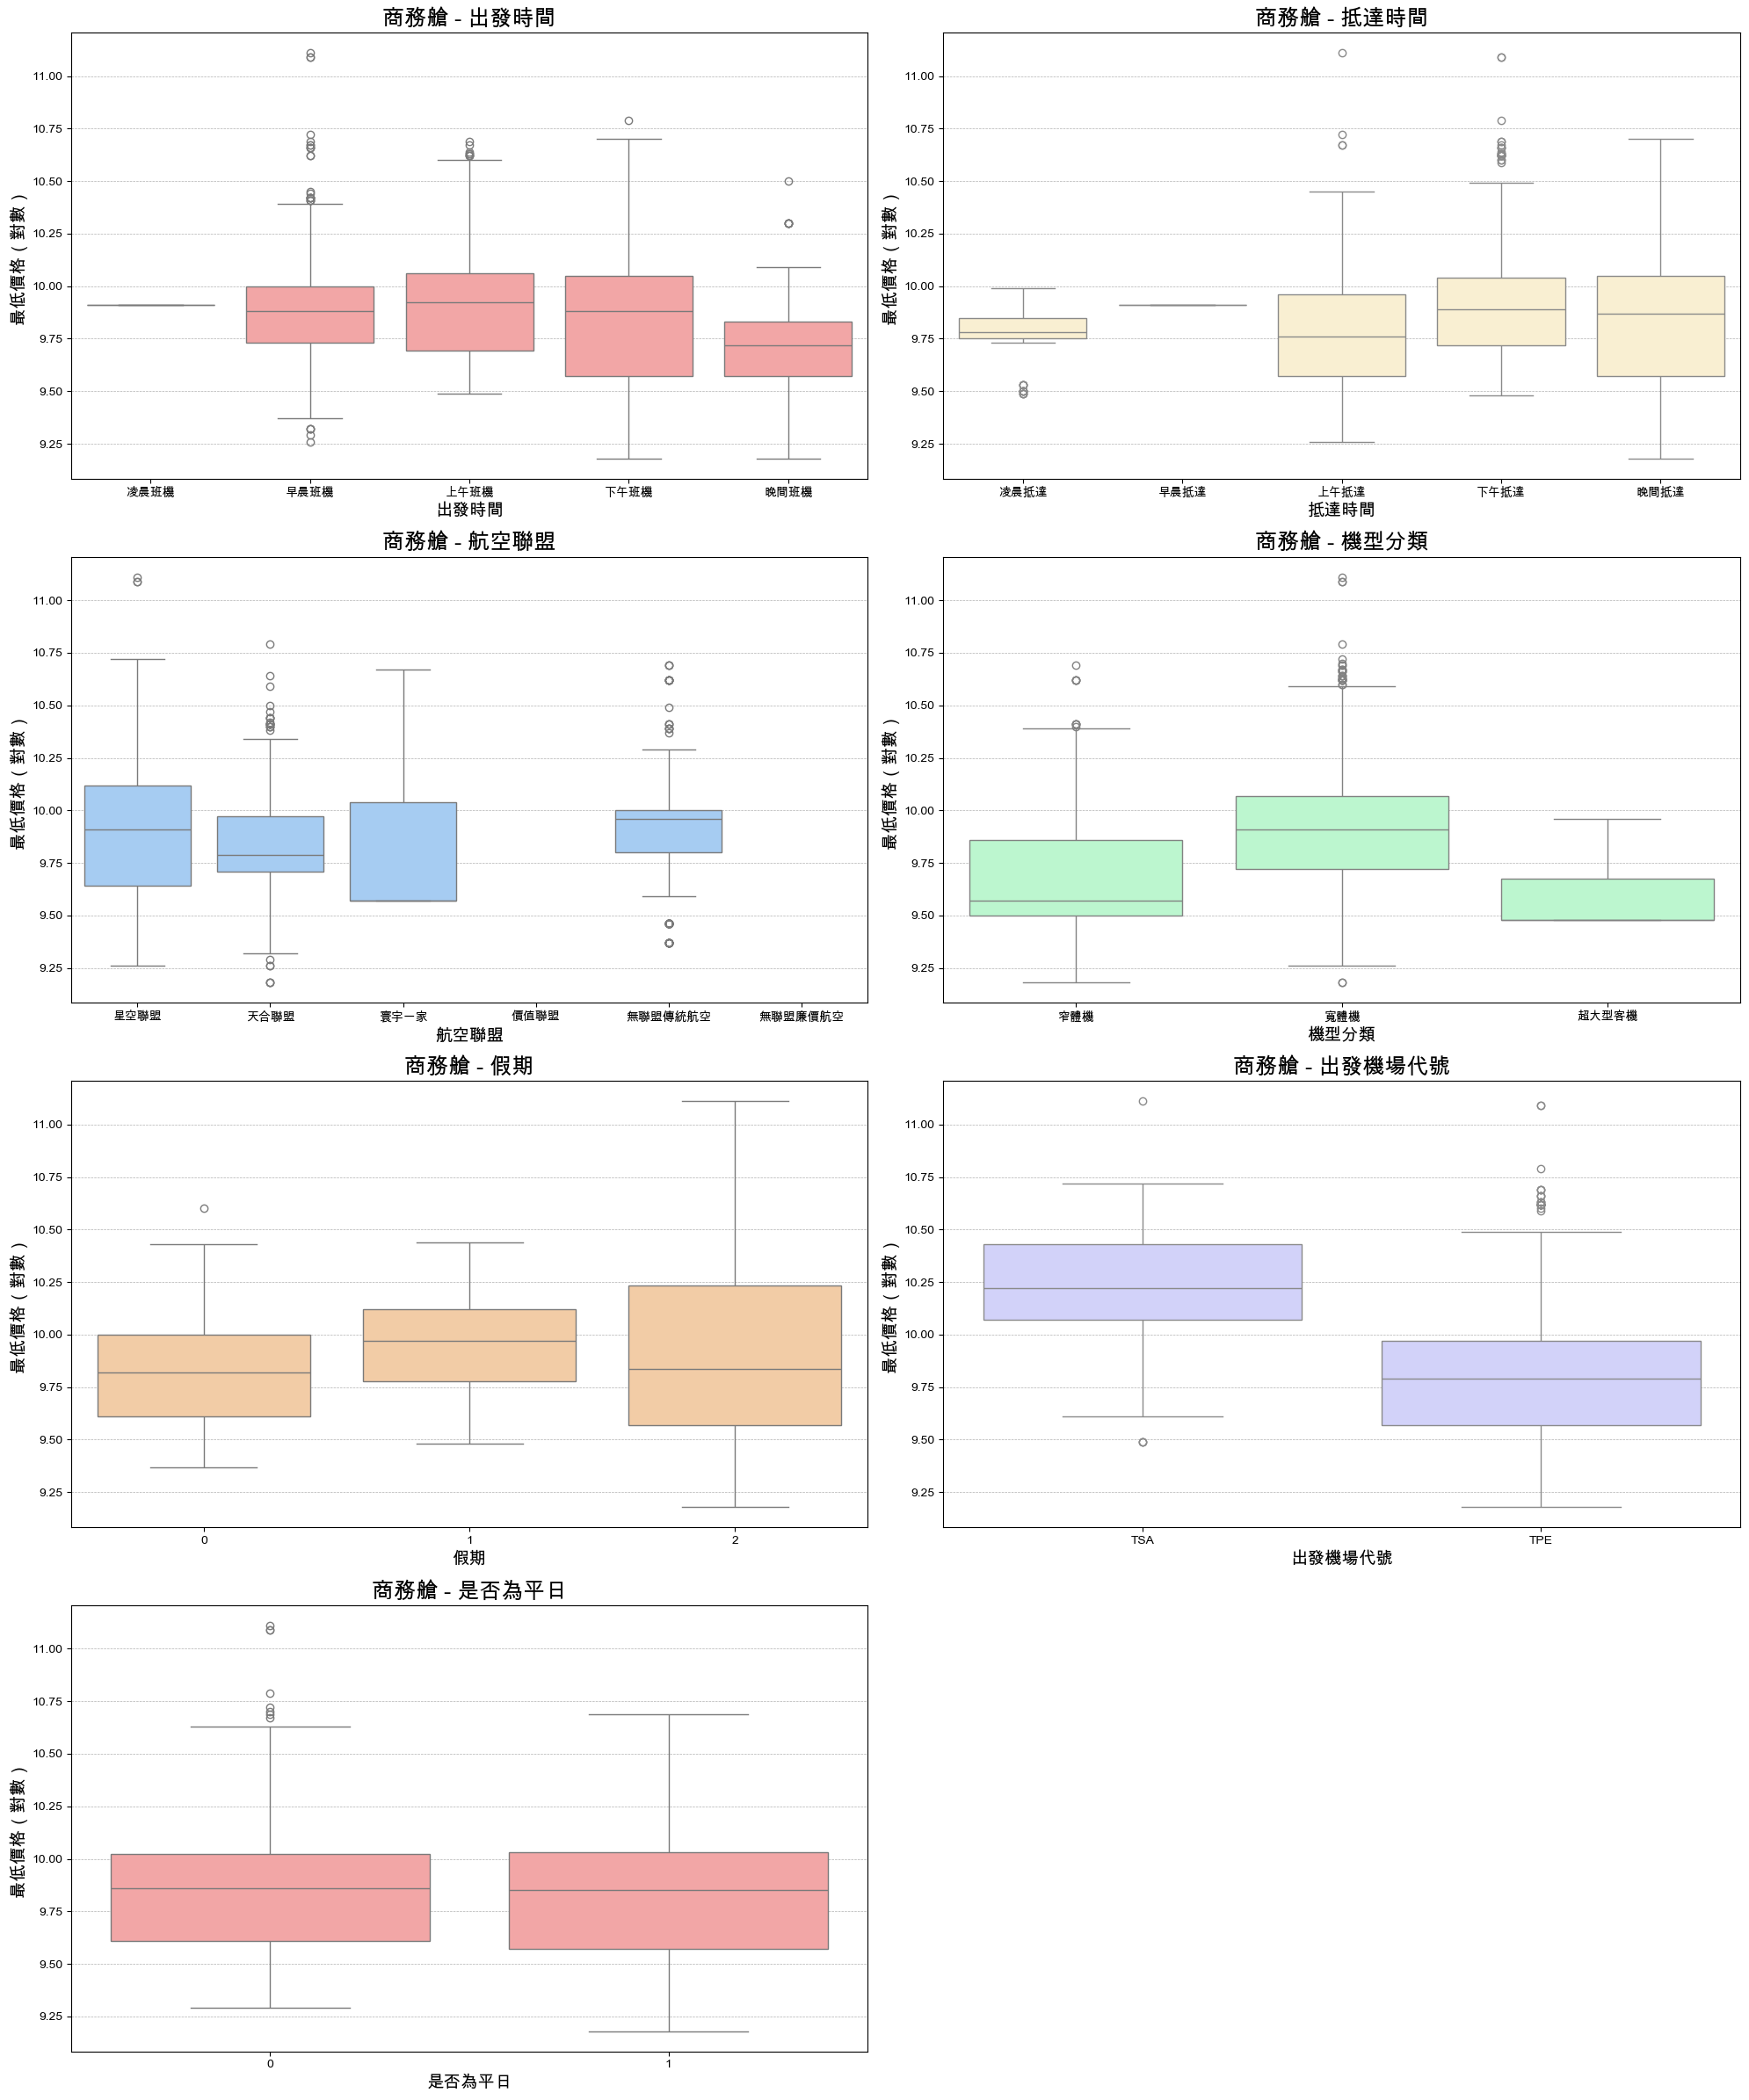

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight.csv'
data = pd.read_csv(file_path)

# ===== 資料前處理 =====
# 出發時段排序
departure_order = ["凌晨班機", "早晨班機", "上午班機", "下午班機", "晚間班機"]
data['出發時段'] = pd.Categorical(data['出發時段'], categories=departure_order, ordered=True)

# 抵達時段排序
arrival_order = ["凌晨抵達", "早晨抵達", "上午抵達", "下午抵達", "晚間抵達"]
data['抵達時段'] = pd.Categorical(data['抵達時段'], categories=arrival_order, ordered=True)

# 航空聯盟分類
alliance_mapping = {
    1: '星空聯盟',
    2: '天合聯盟',
    3: '寰宇一家',
    4: '價值聯盟',
    5: '無聯盟傳統航空',
    6: '無聯盟廉價航空'
}
data['航空聯盟'] = data['航空聯盟'].replace(alliance_mapping)
alliance_order = list(alliance_mapping.values())
data['航空聯盟'] = pd.Categorical(data['航空聯盟'], categories=alliance_order, ordered=True)

# 機型分類
category_mapping = {0: '窄體機', 1: '寬體機', 2: '超大型客機'}
data['機型分類'] = data['機型分類'].map(category_mapping)
category_order = list(category_mapping.values())
data['機型分類'] = pd.Categorical(data['機型分類'], categories=category_order, ordered=True)

# 星期排序
weekday_order = ["星期一", "星期二", "星期三", "星期四", "星期五", "星期六", "星期日"]
data['星期'] = pd.Categorical(data['星期'], categories=weekday_order, ordered=True)

# 分艙等
economy_data = data[data['艙等'] == '經濟艙']
business_data = data[data['艙等'] == '商務艙']

# ===== 設定變數 =====
y_col_var = '最低價格_log'
y_label_text = '最低價格（對數）'
title_fontsize = 18
label_fontsize = 14

# ===== 繪圖函式 =====
def plot_box(data, x_col, y_col, ax, title, x_label, y_label, color):
    sns.boxplot(data=data, x=x_col, y=y_col, ax=ax, color=color)
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xlabel(x_label, fontsize=label_fontsize)
    ax.set_ylabel(y_label, fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

def draw_boxplots_for_class(class_data, class_name):
    fig, axes = plt.subplots(4, 2, figsize=(20, 24))

    plot_box(class_data.sort_values('出發時段'), '出發時段', y_col_var, axes[0, 0],
             f'{class_name} - 出發時間', '出發時間', y_label_text, '#FF9999')
    plot_box(class_data.sort_values('抵達時段'), '抵達時段', y_col_var, axes[0, 1],
             f'{class_name} - 抵達時間', '抵達時間', y_label_text, '#FFF2CC')
    plot_box(class_data.sort_values('航空聯盟'), '航空聯盟', y_col_var, axes[1, 0],
             f'{class_name} - 航空聯盟', '航空聯盟', y_label_text, '#99CCFF')
    plot_box(class_data.sort_values('機型分類'), '機型分類', y_col_var, axes[1, 1],
             f'{class_name} - 機型分類', '機型分類', y_label_text, '#B3FFCC')
    plot_box(class_data, '假期', y_col_var, axes[2, 0],
             f'{class_name} - 假期', '假期', y_label_text, '#FFCC99')
    plot_box(class_data, '出發機場代號', y_col_var, axes[2, 1],
             f'{class_name} - 出發機場代號', '出發機場代號', y_label_text, '#CCCCFF')
    plot_box(class_data, '是否為平日', y_col_var, axes[3, 0],
             f'{class_name} - 是否為平日', '是否為平日', y_label_text, '#FF9999')

    # 隱藏最後一個子圖
    axes[3, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# 繪製經濟艙 & 商務艙
draw_boxplots_for_class(economy_data, "經濟艙")
draw_boxplots_for_class(business_data, "商務艙")

## 平均價格_log vs. 出發日期

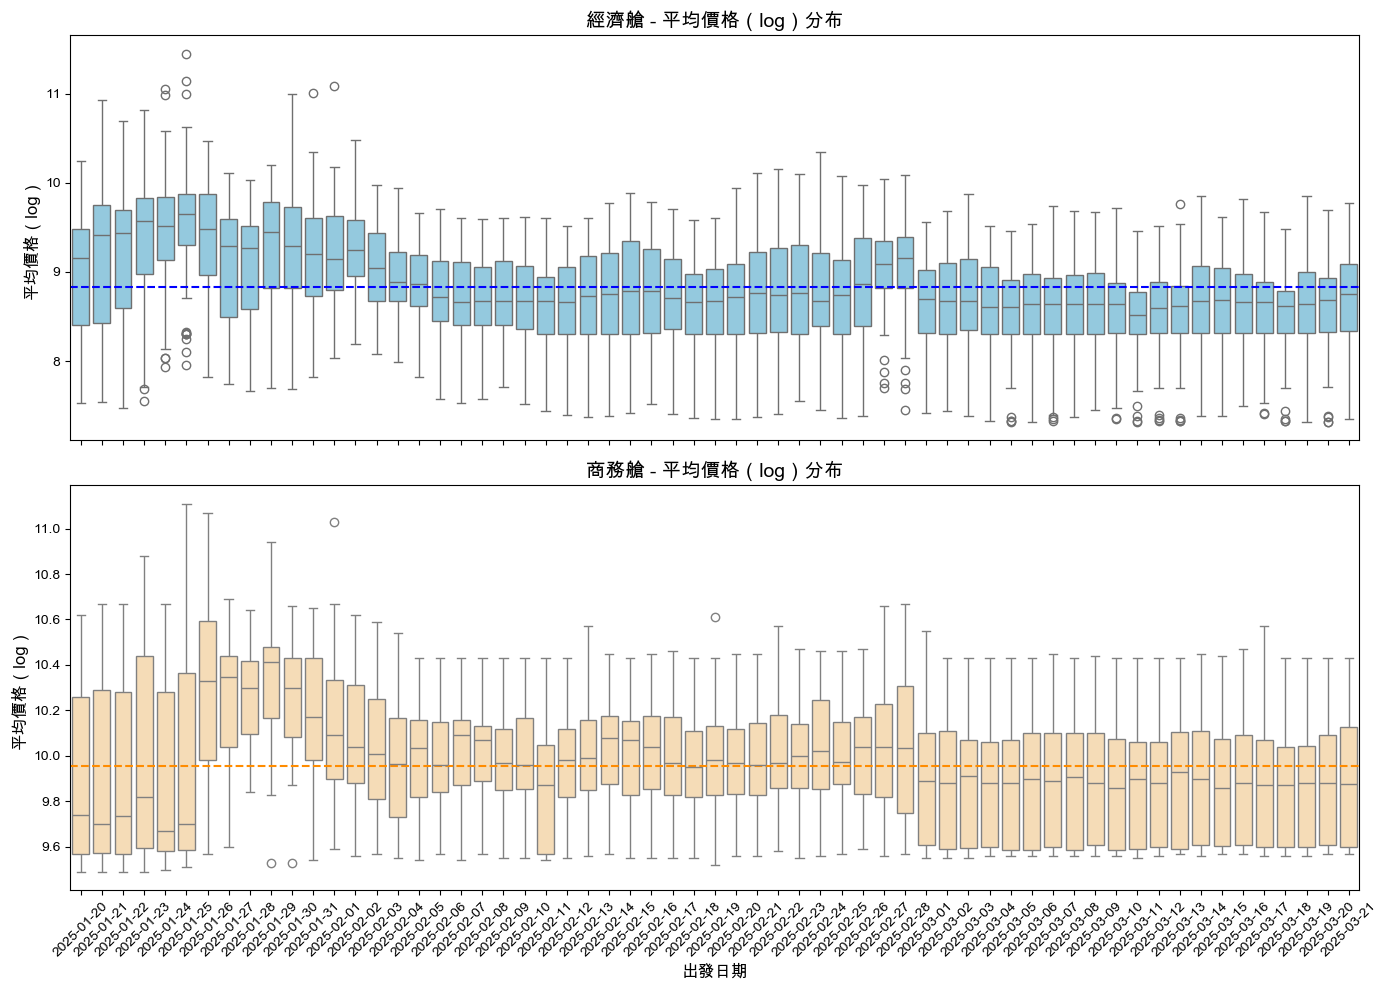

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 字體與樣式
plt.rcParams['font.family'] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False

# 讀資料
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight.csv'
data = pd.read_csv(file_path)

# 日期格式處理
data['出發日期'] = pd.to_datetime(data['出發日期'])

# 分艙等
economy_data = data[data['艙等'] == '經濟艙']
business_data = data[data['艙等'] == '商務艙']

# 設定畫布與子圖
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# --- 經濟艙 ---
sns.boxplot(x='出發日期', y='平均價格_log', data=economy_data, ax=axes[0], color='skyblue')
axes[0].axhline(economy_data['平均價格_log'].mean(), color='blue', linestyle='--', linewidth=1.5)
axes[0].set_title('經濟艙 - 平均價格（log）分布', fontsize=14, weight='bold')
axes[0].set_ylabel('平均價格（log）', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# --- 商務艙 ---
sns.boxplot(x='出發日期', y='平均價格_log', data=business_data, ax=axes[1], color='navajowhite')
axes[1].axhline(business_data['平均價格_log'].mean(), color='darkorange', linestyle='--', linewidth=1.5)
axes[1].set_title('商務艙 - 平均價格（log）分布', fontsize=14, weight='bold')
axes[1].set_xlabel('出發日期', fontsize=12)
axes[1].set_ylabel('平均價格（log）', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# 整體美化
plt.tight_layout()
plt.show()

## 最低價格_log vs. 出發日期

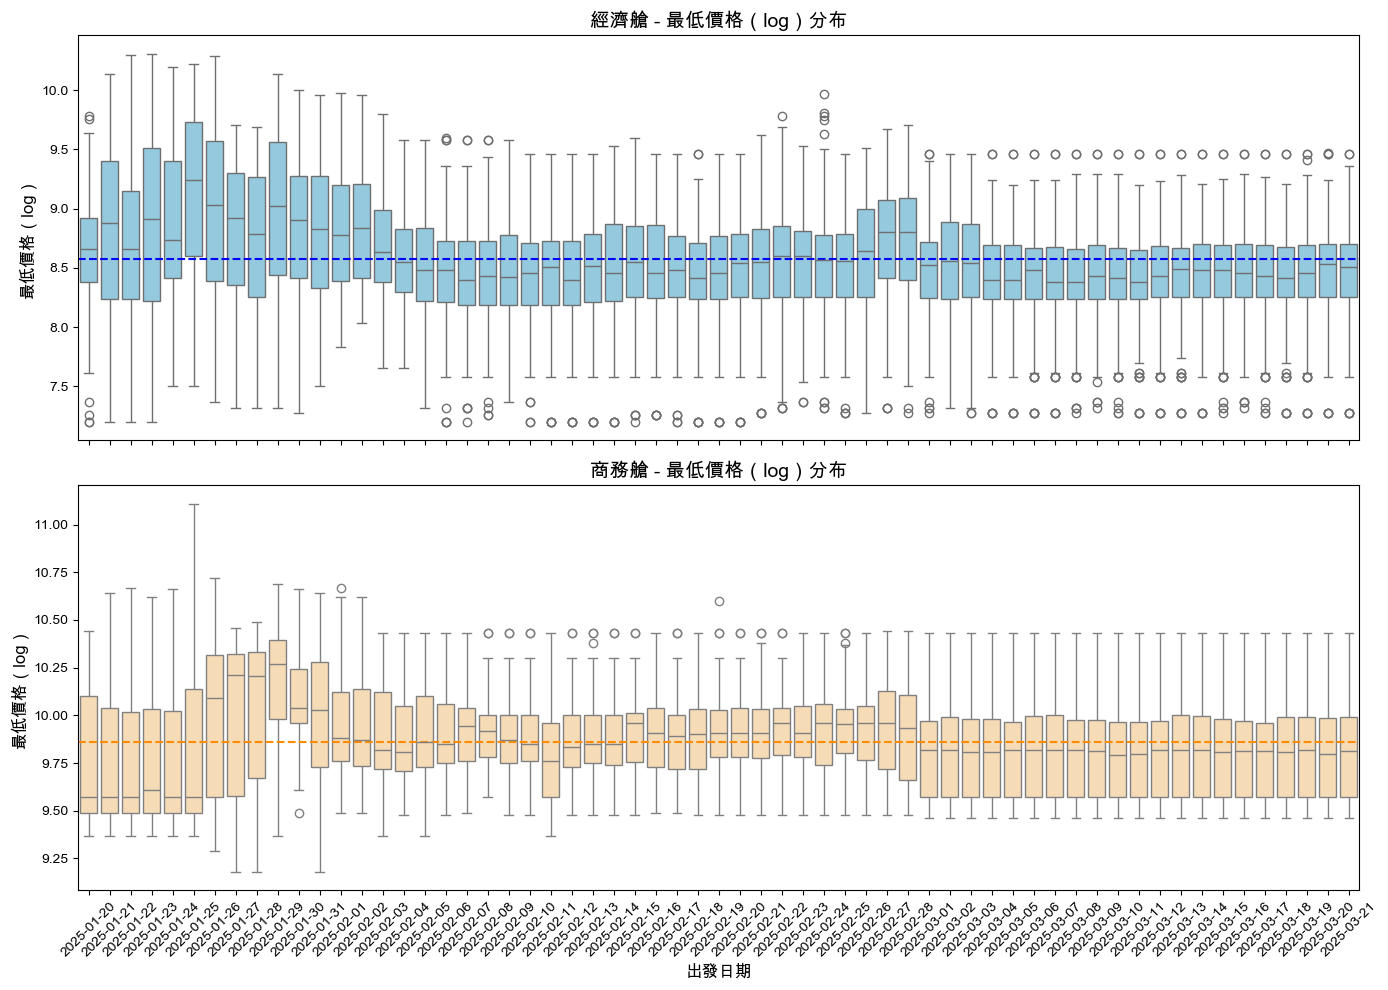

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 字體與樣式
plt.rcParams['font.family'] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False

# 讀資料
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight.csv'
data = pd.read_csv(file_path)

# 日期格式處理
data['出發日期'] = pd.to_datetime(data['出發日期'])

# 分艙等
economy_data = data[data['艙等'] == '經濟艙']
business_data = data[data['艙等'] == '商務艙']

# 設定畫布與子圖
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# --- 經濟艙 ---
sns.boxplot(x='出發日期', y='最低價格_log', data=economy_data, ax=axes[0], color='skyblue')
axes[0].axhline(economy_data['最低價格_log'].mean(), color='blue', linestyle='--', linewidth=1.5)
axes[0].set_title('經濟艙 - 最低價格（log）分布', fontsize=14, weight='bold')
axes[0].set_ylabel('最低價格（log）', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# --- 商務艙 ---
sns.boxplot(x='出發日期', y='最低價格_log', data=business_data, ax=axes[1], color='navajowhite')
axes[1].axhline(business_data['最低價格_log'].mean(), color='darkorange', linestyle='--', linewidth=1.5)
axes[1].set_title('商務艙 - 最低價格（log）分布', fontsize=14, weight='bold')
axes[1].set_xlabel('出發日期', fontsize=12)
axes[1].set_ylabel('最低價格（log）', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# 整體美化
plt.tight_layout()
plt.show()

## 相關係數圖

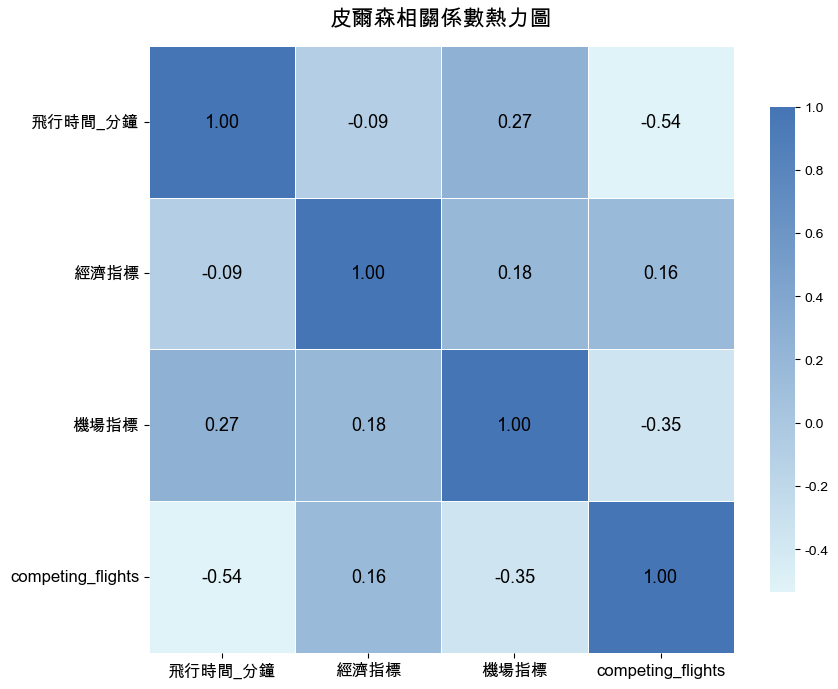

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 設定字體與風格（繁體中文顯示 + 簡潔日系風）
plt.rcParams['font.family'] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False

# 讀取資料
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight.csv'
data = pd.read_csv(file_path)

# 數值型變數
numerical_cols = [
    '飛行時間_分鐘', '經濟指標', '機場指標', 'competing_flights',
]

# 計算皮爾森相關係數
corr_matrix = data[numerical_cols].corr(method='pearson')

# 畫圖
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=sns.color_palette("blend:#e0f3f8,#4575b4", as_cmap=True),
    annot_kws={"size": 13, "weight": "bold", "color": "black"},
    linewidths=0.4,
    linecolor='white',
    cbar_kws={"shrink": 0.8}
)

# 美化標題與刻度
plt.title("皮爾森相關係數熱力圖", fontsize=16, weight='bold', pad=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()